# The Spark Foundation Internship - GRIPSEPT21

# Data Science and Business Analytics

# Author: EMO SIANI LOIC

## Task 6 : Prediction Using Decision Tree Algorithm

### Task Goal: Create the Decision Tree Classifier and visualize it graphically

### 1- Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

### 2- Loading dataset

In [9]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values
y = y=iris.target

In [11]:
X.shape

(150, 4)

In [12]:
y.shape

(150,)

### 3- Splitting our dataset into training data and test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

### 4- Defining our Decision Tree Algorithm

In [15]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
# Train our model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
# Training score
dtree.score(X_train,y_train)

1.0

### 5- Making Predictions of our test data

In [20]:
predictions = dtree.predict(X_test)

In [21]:
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

**Comparing Actual Vs Predicted**

In [22]:
comparaison = pd.DataFrame({"Actual":y_test,"Predicted":predictions})

In [23]:
comparaison.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


### 6 - Accuracy of our model

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("the score on the test data is {}".format(accuracy_score(y_test,predictions)))

the score on the test data is 1.0


### 7- Visualising the Decision Tree to understand it better.

In [26]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [30]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

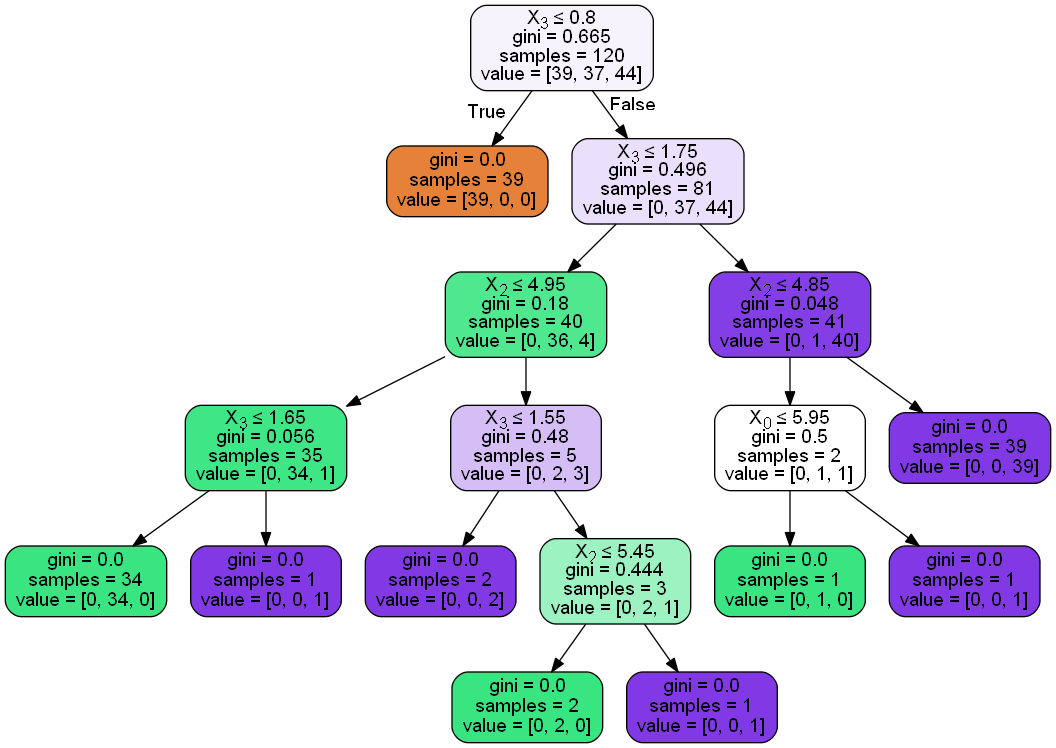

In [32]:
# Import necessary libraries for graph viz
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

# Visualize the graph
svg_graph = graph.create_svg()
svg = open('entropy_tree.svg', 'wb')
svg.write(svg_graph)
svg.close()

Image(graph.create_png())

### 8- Prediction of a new entry

In [42]:
X_new = np.array([4.9,3.2,0.9,0.35]).reshape(1,-1)

In [43]:
pred = dtree.predict(X_new)

In [47]:
print("The new entry belongs to class {}.".format(pred[0]))

The new entry belongs to class 0.
